In [1]:
import numpy
import scipy
import netCDF4
import matplotlib.pyplot as mp
import matplotlib.ticker
import multiprocessing

mp.rcParams.update({'mathtext.default': 'regular'})
% matplotlib inline

In [2]:
def geo_idx(dd, dd_array):
   """
     search for nearest decimal degree in an array of decimal degrees and return the index.
     np.argmin returns the indices of minium value along an axis.
     so subtract dd from all values in dd_array, take absolute value and find index of minium.
    """
   geo_idx = (numpy.abs(dd_array - dd)).argmin()
   return geo_idx

LA_lat = 34.0522
LA_lon = 118.2437 # deg west
LA_lon = 180. + (180-LA_lon)

In [3]:
working_dir = '/ninod/NCAR_LENS/daily/PRECT/B20TRC5CNBDRD/'

In [4]:
file_list = numpy.array(( \
'b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h1.PRECT.18500101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.003.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.004.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.005.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.006.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.007.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.008.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.009.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.010.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.011.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.012.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.013.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.014.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.015.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.016.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.017.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.018.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.019.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.020.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.021.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.022.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.023.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.024.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.025.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.026.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.027.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.028.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.029.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.030.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.031.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.032.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.033.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.034.cam.h1.PRECT.19200101-20051231.nc', \
'b.e11.B20TRC5CNBDRD.f09_g16.035.cam.h1.PRECT.19200101-20051231.nc' ))

In [5]:
i = 0

ncfile = netCDF4.Dataset(working_dir + file_list[i])
PRECT_lat = ncfile.variables['lat'][:]
PRECT_lon = ncfile.variables['lon'][:]
PRECT_time_var = ncfile.variables['time']

PRECT_time_dates = netCDF4.num2date(PRECT_time_var[:], PRECT_time_var.units, PRECT_time_var.calendar)
time_indices_ONDJFM = numpy.array([t.month in [10,11,12,1,2,3] for t in PRECT_time_dates], dtype=bool)

LA_lat_idx = geo_idx(LA_lat, PRECT_lat)
LA_lon_idx = geo_idx(LA_lon, PRECT_lon)

PRECT_ONDJFM_CA = ncfile.variables['PRECT'][time_indices_ONDJFM,(LA_lat_idx-2):(LA_lat_idx+2), (LA_lon_idx-2):(LA_lon_idx+2)]*86400.*1000

In [6]:
bins = numpy.logspace(-2,numpy.log10(PRECT_ONDJFM_CA.max()),100) # log spaced bins
hist_histogram, bin_edges = numpy.histogram(PRECT_ONDJFM_CA, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

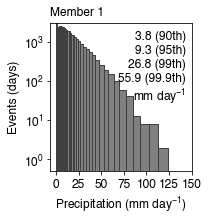

In [7]:
fig = mp.figure(figsize=(3,3))
fontsize=12

ax = fig.add_subplot(111)
ax.bar(bin_centers, hist_histogram, align='center', width=bin_width, color='0.5', edgecolor='0.25', label='historical')
#ax.step(bin_centers, hist_histogram, where='mid',color='0')

#ax.set_xlim(bins[0], bins[-1])
ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Events (days)', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm day$^{-1}$)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xticks([0,25,50,75,100,125,150])
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

ax.set_ylim(0.5,3000)
ax.minorticks_off()
#ax.grid()
ax.set_axisbelow(True)

#ax_right = ax.twinx()
ax_min, ax_max = ax.get_ylim()
#ax_right.set_yticks([1,2,3,4,5,10])
#ax_right.tick_params(labelsize=fontsize)
#ax_right.set_ylim(numpy.log(ax_min), numpy.log(ax_max))

perc50 = numpy.percentile(PRECT_ONDJFM_CA, 50)
perc75 = numpy.percentile(PRECT_ONDJFM_CA, 75)
perc80 = numpy.percentile(PRECT_ONDJFM_CA, 80)
perc90 = numpy.percentile(PRECT_ONDJFM_CA, 90)
perc95 = numpy.percentile(PRECT_ONDJFM_CA, 95)
perc99 = numpy.percentile(PRECT_ONDJFM_CA, 99)
perc999 = numpy.percentile(PRECT_ONDJFM_CA, 99.9)

perc_text = \
'{:.1f}'.format(perc90) + ' (90th)\n' + \
'{:.1f}'.format(perc95) + ' (95th)\n' + \
'{:.1f}'.format(perc99) + ' (99th)\n' + \
'{:.1f}'.format(perc999) + ' (99.9th)\n' + \
'mm day$^{-1}$'

ax.text(s=perc_text, x=0.96, y=0.93, transform=ax.transAxes, ha='right', va='top', fontsize=fontsize)

ax.text(s='Member '+str(i+1), x=0, y=1.03, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
fig.tight_layout()

mp.savefig('single_realization_historical.pdf', transparent=True, bbox_inches='tight')

In [8]:
minval=0.2 # for inferno:  0.18
maxval=0.9 # for inferno: 1.0
n=256
full_cmap = mp.get_cmap('magma')
cmap_partial = matplotlib.colors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=full_cmap.name, a=minval, b=maxval), full_cmap(numpy.linspace(minval, maxval, n)))

b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h1.PRECT.18500101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.003.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.004.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.005.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.006.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.007.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.008.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.009.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.010.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.011.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.012.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.013.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.014.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.015.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20T

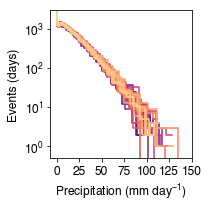

In [13]:
fig = mp.figure(figsize=(3,3))
fontsize=12
ax = fig.add_subplot(111)

    for i in range(file_list.size):

    print(file_list[i])

    ncfile = netCDF4.Dataset(working_dir + file_list[i])
    PRECT = ncfile.variables['PRECT'][:,(LA_lat_idx-2):(LA_lat_idx+2),(LA_lon_idx-2):(LA_lon_idx+2)]*86400.*1000
    PRECT_time_var = ncfile.variables['time']

    PRECT_time_dates = netCDF4.num2date(PRECT_time_var[:], PRECT_time_var.units, PRECT_time_var.calendar)

    if i==0:
        time_indices_ONDJFM = numpy.array([(t.month in [10,11,12,1,2,3])&(t.year in range(1920,2006)) for t in PRECT_time_dates], dtype=bool)
    else:
        time_indices_ONDJFM = numpy.array([t.month in [10,11,12,1,2,3] for t in PRECT_time_dates], dtype=bool)
    #PRECT_ONDJFM = PRECT[time_indices_ONDJFM,:,:]

    PRECT_ONDJFM_CA = PRECT[time_indices_ONDJFM,:,:]

    ncfile.close()

    bins = numpy.logspace(-2,numpy.log10(PRECT_ONDJFM_CA.max()),100) # log spaced bins
    #bins = numpy.linspace(0.1,PRECT_ONDJFM_CA.max(),100) # linearly spaced bins
    hist_histogram, bin_edges = numpy.histogram(PRECT_ONDJFM_CA, bins=bins, density=False)
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

    #ax.bar(bin_centers, hist_histogram, align='center', width=bin_width, color='0.5', edgecolor='0.25', label='historical')
    ax.step(bin_centers, hist_histogram, where='mid', color=cmap_partial(i/(file_list.size-1)))

    #ax.set_xlim(bins[0], bins[-1])

    ax.tick_params(labelsize=fontsize)
    ax.set_ylabel('Events (days)', fontsize=fontsize)
    ax.set_xlabel('Precipitation (mm day$^{-1}$)', fontsize=fontsize)
    ax.set_yscale('log') # 'symlog'
    ax.set_xticks([0,25,50,75,100,125,150])
    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

    ax.set_ylim(0.5,3000)
    ax.minorticks_off()
    #ax.grid()
    ax.set_axisbelow(True)

    mp.tight_layout()
    mp.savefig('all_historical_histograms.pdf', bbox_inches='tight', transparent=True)
    #perc50 = numpy.percentile(PRECT_ONDJFM_CA, 50)
    #perc75 = numpy.percentile(PRECT_ONDJFM_CA, 75)
    #perc80 = numpy.percentile(PRECT_ONDJFM_CA, 80)
    #perc90 = numpy.percentile(PRECT_ONDJFM_CA, 90)
    #perc95 = numpy.percentile(PRECT_ONDJFM_CA, 95)
    #perc99 = numpy.percentile(PRECT_ONDJFM_CA, 99)
    #perc999 = numpy.percentile(PRECT_ONDJFM_CA, 99.9)

    #perc_text = \
    #'{:.1f}'.format(perc90) + ' (90th)\n' + \
    #'{:.1f}'.format(perc95) + ' (95th)\n' + \
    #'{:.1f}'.format(perc99) + ' (99th)\n' + \
    #'{:.1f}'.format(perc999) + ' (99.9th)\n' + \
    #'mm day$^{-1}$'

    #ax.text(s=perc_text, x=0.96, y=0.93, transform=ax.transAxes, ha='right', va='top', fontsize=fontsize) 

b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h1.PRECT.18500101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.003.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.004.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.005.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.006.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.007.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.008.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.009.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.010.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.011.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.012.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.013.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.014.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20TRC5CNBDRD.f09_g16.015.cam.h1.PRECT.19200101-20051231.nc
b.e11.B20T

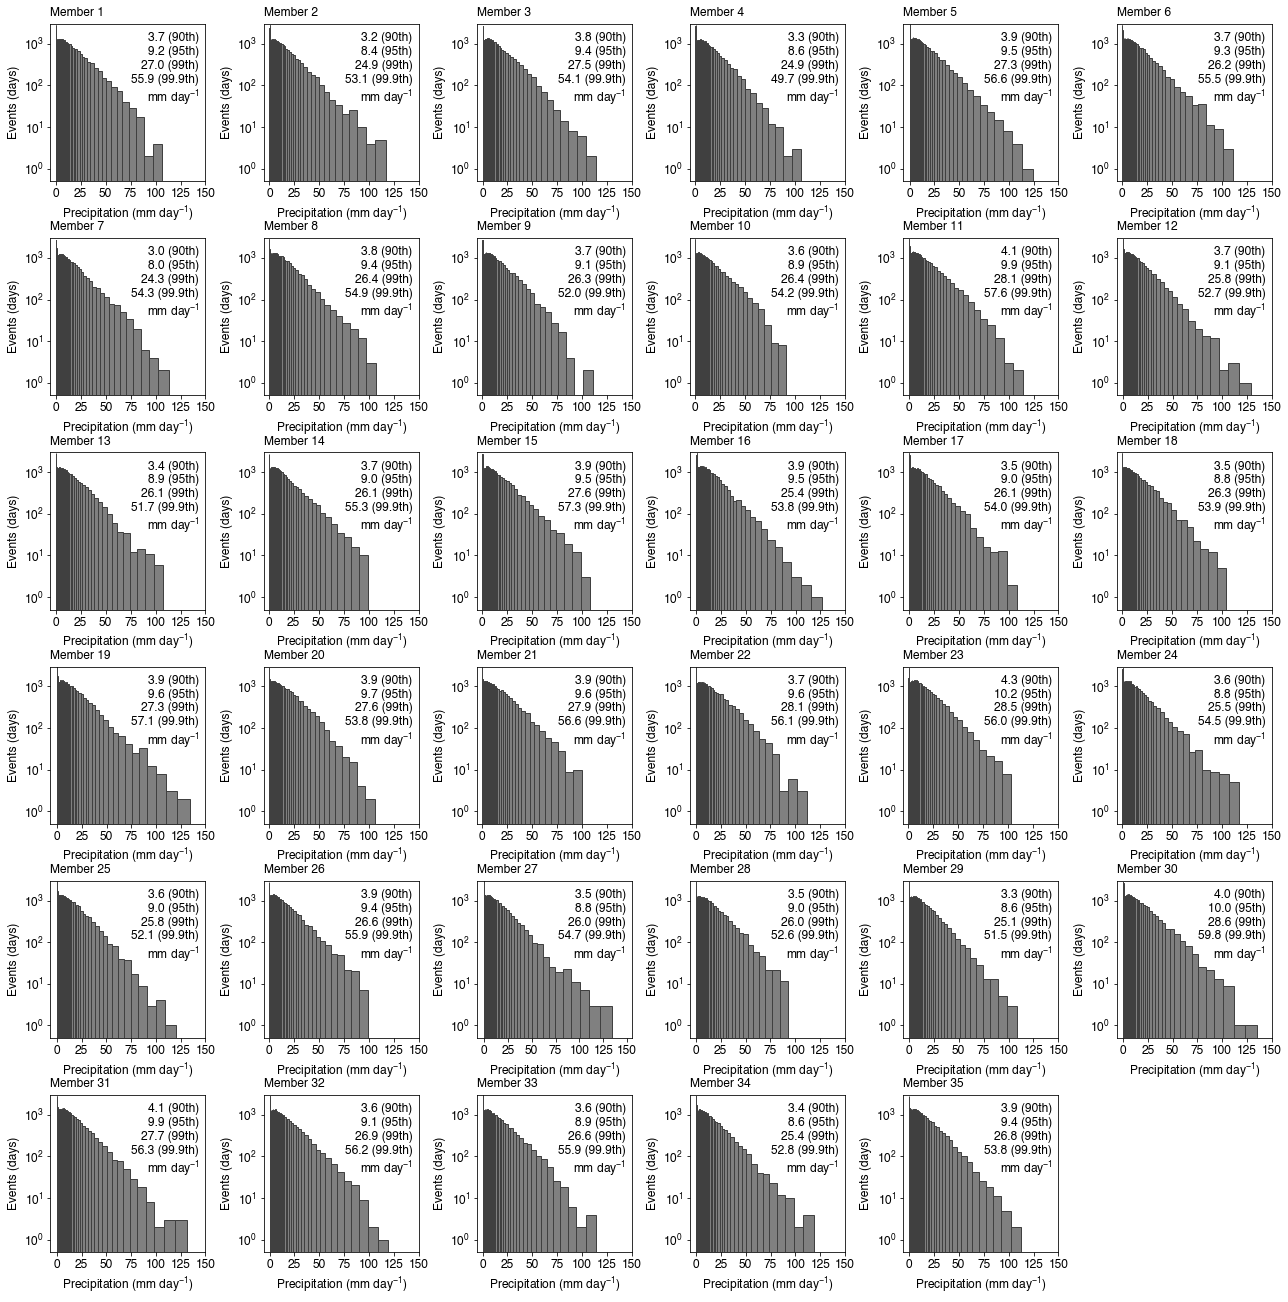

In [10]:
fig = mp.figure(figsize=(18,18))
fontsize=12

for i in range(file_list.size):
    
    print(file_list[i])
    
    ncfile = netCDF4.Dataset(working_dir + file_list[i])
    PRECT = ncfile.variables['PRECT'][:,(LA_lat_idx-2):(LA_lat_idx+2),(LA_lon_idx-2):(LA_lon_idx+2)]*86400.*1000
    PRECT_time_var = ncfile.variables['time']
    
    PRECT_time_dates = netCDF4.num2date(PRECT_time_var[:], PRECT_time_var.units, PRECT_time_var.calendar)

    if i==0:
        time_indices_ONDJFM = numpy.array([(t.month in [10,11,12,1,2,3])&(t.year in range(1920,2006)) for t in PRECT_time_dates], dtype=bool)
    else:
        time_indices_ONDJFM = numpy.array([t.month in [10,11,12,1,2,3] for t in PRECT_time_dates], dtype=bool)

    PRECT_ONDJFM_CA = PRECT[time_indices_ONDJFM,:,:]

    ncfile.close()
    
    bins = numpy.logspace(-2,numpy.log10(PRECT_ONDJFM_CA.max()),100) # log spaced bins
    #bins = numpy.linspace(0.1,PRECT_ONDJFM_CA.max(),100) # linearly spaced bins
    hist_histogram, bin_edges = numpy.histogram(PRECT_ONDJFM_CA, bins=bins, density=False)
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

    ax = fig.add_subplot(6,6,i+1)
    ax.bar(bin_centers, hist_histogram, align='center', width=bin_width, color='0.5', edgecolor='0.25', label='historical')
    #ax.set_xlim(bins[0], bins[-1])
    ax.tick_params(labelsize=fontsize)
    ax.set_ylabel('Events (days)', fontsize=fontsize)
    ax.set_xlabel('Precipitation (mm day$^{-1}$)', fontsize=fontsize)
    ax.set_yscale('log') # 'symlog'
    ax.set_xticks([0,25,50,75,100,125,150])
    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
    ax.set_ylim(0.5,3000)
    ax.minorticks_off()
    #ax.grid()
    #ax.set_axisbelow(True)

    perc90 = numpy.percentile(PRECT_ONDJFM_CA, 90)
    perc95 = numpy.percentile(PRECT_ONDJFM_CA, 95)
    perc99 = numpy.percentile(PRECT_ONDJFM_CA, 99)
    perc999 = numpy.percentile(PRECT_ONDJFM_CA, 99.9)

    perc_text = \
    '{:.1f}'.format(perc90) + ' (90th)\n' + \
    '{:.1f}'.format(perc95) + ' (95th)\n' + \
    '{:.1f}'.format(perc99) + ' (99th)\n' + \
    '{:.1f}'.format(perc999) + ' (99.9th)\n' + \
    'mm day$^{-1}$'

    ax.text(s=perc_text, x=0.96, y=0.93, transform=ax.transAxes, ha='right', va='top', fontsize=fontsize)

    ax.text(s='Member '+str(i+1), x=0, y=1.03, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)

fig.tight_layout(w_pad=0.5)
mp.savefig('historical_histograms.pdf', transparent=True, bbox_inches='tight')